# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning
“Sumber daya manusia (SDM) adalah aset utama yang perlu dikelola dengan baik oleh perusahaan agar tujuan bisnis dapat tercapai dengan efektif dan efisien. Pada kesempatan kali ini, kita akan menghadapi sebuah permasalahan tentang sumber daya manusia yang ada di perusahaan. Fokus kita adalah untuk mengetahui bagaimana cara menjaga karyawan agar tetap bertahan di perusahaan yang ada saat ini yang dapat mengakibatkan bengkaknya biaya untuk rekrutmen karyawan serta pelatihan untuk mereka yang baru masuk. Dengan mengetahui faktor utama yang menyebabkan karyawan tidak merasa nyaman, perusahaan dapat segera menanggulanginya dengan membuat program-program yang relevan dengan permasalahan karyawan. “

Created : Jodhi Krisantus Sihalbu

gmail   : sihalbu241299@gmail.com | jodhi1911253@itpln.ac.id

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel(r"Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx")
print(df.shape)
df.head()

(287, 25)


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
miss_value = pd.DataFrame( data = df.isna().sum(), columns={'Jumlah Miising Value'}, index=df.columns)
rati_miss_value = pd.DataFrame(data=round(df.isna().sum() / len(df) * 100,2), columns={"ratio (%)"})
pd.concat([miss_value,rati_miss_value],axis=1)

,Jumlah Miising Value,ratio (%)
Username,0,0.00
EnterpriseID,0,0.00
StatusPernikahan,0,0.00
JenisKelamin,0,0.00
StatusKepegawaian,0,0.00
Pekerjaan,0,0.00
JenjangKarir,0,0.00
PerformancePegawai,0,0.00
AsalDaerah,0,0.00
HiringPlatform,0,0.00


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [6]:
df.describe(include="object").T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


- Terdapat ``Missing value`` pada kolom (SkorKepuasanPegawai = 1.74%, JumlahKeikutsertaanProjek = 1.05%, JumlahKeterlambatanSebulanTerakhir = 0.35%, JumlahKetidakhadiran = 2.09%, `IkutProgramLOP = 89.90%`, AlasanResign = 23%)
- Data type object pada (TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan, TanggalResign), seharusnya adalah datetime
- Pada kolom `NomorHP` mempunyai value `+6282232522xxx`. Lebih baik dikateggorikan menjadi kategori provider
- Pada kolom `Email` lebih baik dikategorikan, contoh : yahoo, gmail, hotmail, dll

In [7]:
numeric = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']

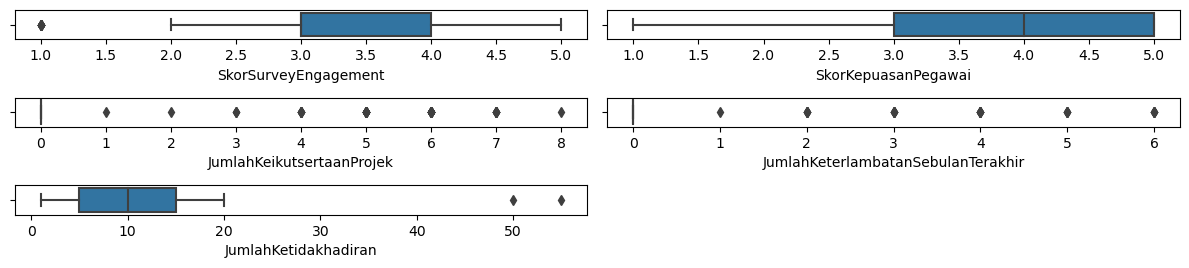

In [8]:
plt.figure(figsize=(12,12))
for i in range(len(numeric)):
    sns.color_palette(palette="BuGn")
    plt.subplot( 14,2, i+1 )
    sns.boxplot( data=df, x=df[numeric[i]] )
    plt.tight_layout()

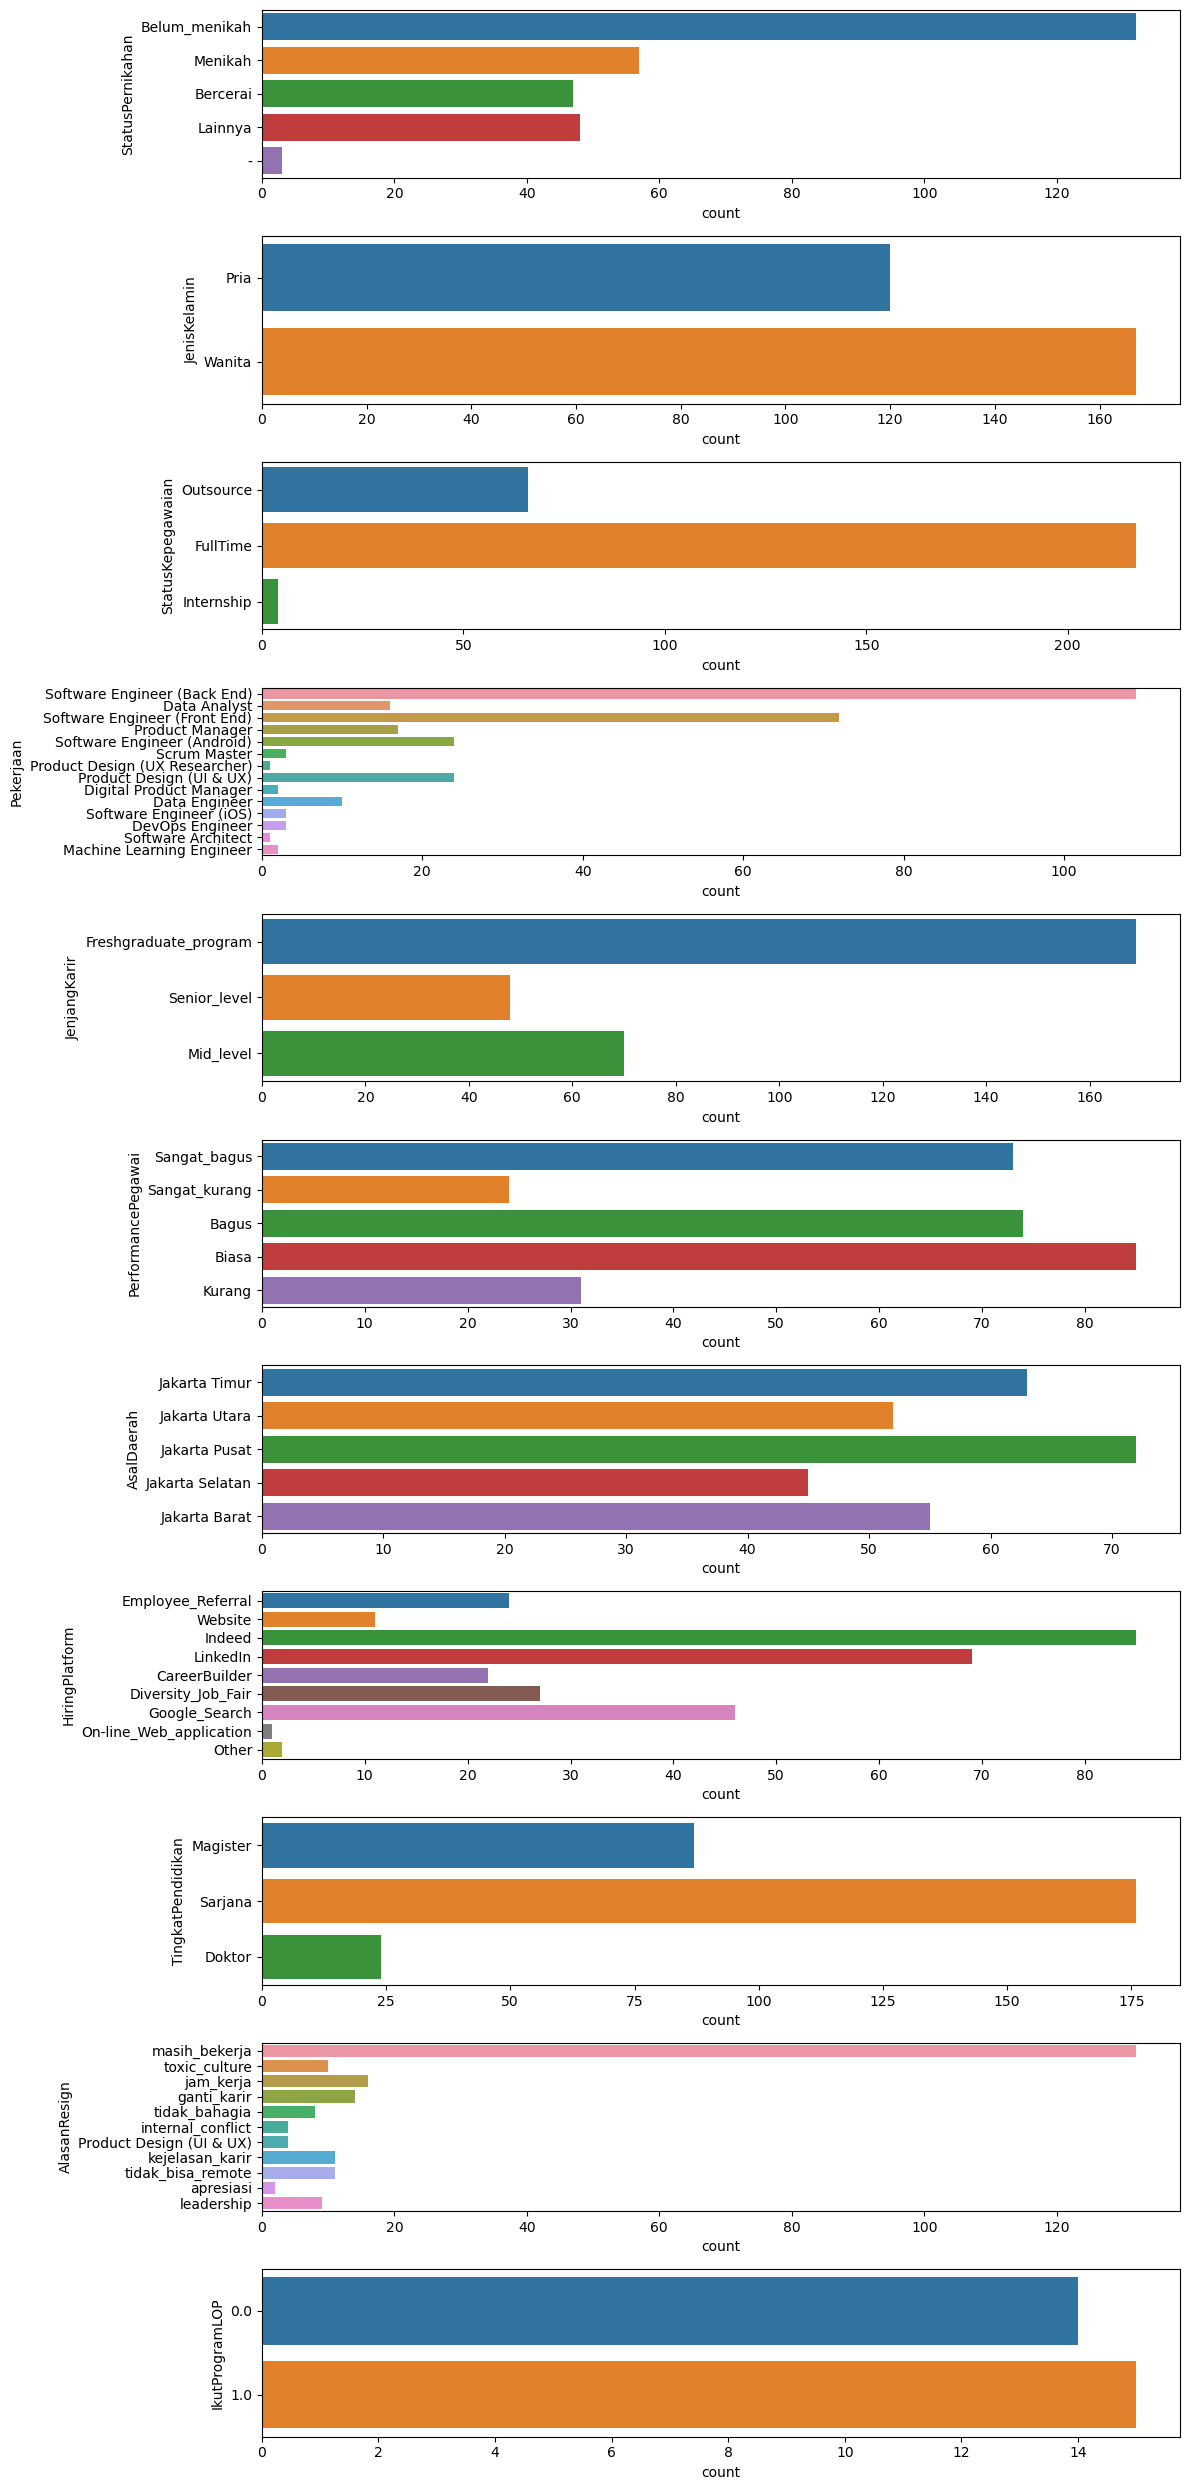

In [9]:
obj = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform',
       'TingkatPendidikan','AlasanResign','IkutProgramLOP']

plt.figure(figsize=(12,25))
for i in range(len(obj)):
    plt.subplot( 11,1, i+1 )
    sns.countplot( data=df, y=df[obj[i]] )
    plt.tight_layout()

# Preprocessing

In [10]:
df_pre = df.copy()

**Etract Resign / Not Resign**
- Resign = 1
- Not_Resign = 0

In [11]:
def resign_validation(value):
    if value != '-':
        return 1
    else:
        return 0
df_pre['is_resign']= df_pre['TanggalResign'].apply( lambda x: resign_validation(x) )
df_pre.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign
172,grizzledDingo0,110580,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Timur,Indeed,4,4.0,0.0,0.0,8.0,+6289622388xxx,grizzledDingo0438@hotmail.com,Sarjana,1,1.0,masih_bekerja,1990-04-19,2014-05-05,2020-1-24,-,0
118,cruelGnu6,106599,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,LinkedIn,4,5.0,0.0,0.0,15.0,+6281209169xxx,cruelGnu6026@gmail.com,Sarjana,1,NaN,masih_bekerja,1975-09-30,2012-10-02,2020-2-14,-,0
279,peacefulChamois3,106257,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,13.0,+6282208741xxx,peacefulChamois3574@icloud.com,Doktor,1,NaN,NaN,1980-04-18,2013-07-08,2020-1-22,-,0
159,peskyJaguar5,110665,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Selatan,Indeed,4,5.0,0.0,0.0,14.0,+6289950860xxx,peskyJaguar5956@icloud.com,Sarjana,1,1.0,masih_bekerja,1988-11-08,2011-01-10,2020-1-27,-,0
183,aboardUnicorn8,106687,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Indeed,3,3.0,0.0,0.0,6.0,+6281943118xxx,aboardUnicorn8967@outlook.com,Magister,1,NaN,masih_bekerja,1968-01-15,2006-01-09,2020-01-04,-,0


## Handling Missing Value

- SkorKepuasanPegawai = 1.74 %
- JumlahKeikutsertaanProjek = 1.05% 
- JumlahKeterlambatanSebulanTerakhir = 0.35%
- JumlahKetidakhadiran = 2.09 %
- IkutProgramLOP = 89.90 %
- AlasanResign = 23.00 %

**Alsan Resign**

Semua missing value pada fitur `Alsan Resign` merupakan karyawan yang masih bekerja. Sehingga fill missing value dengan 'masih_bekerja'

In [12]:
len( df_pre[ (df_pre['AlasanResign'].isna()==True) & (df_pre['is_resign']==1) ] ) #Check apakah ada karyawan resign, yang tidak mengisi form Alasan Resign 

0

In [13]:
df_pre['AlasanResign'] = df_pre['AlasanResign'].fillna('masih_bekerja')
df_pre['AlasanResign'].isna().sum()

0

**Ikut Program LOP**

Karena jumlah missing value terlalu banyak (89%), maka kita remove feature IkutProgramLOP|

In [14]:
print(df_pre['IkutProgramLOP'].value_counts())

1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64


In [15]:
df_pre = df_pre.drop('IkutProgramLOP', axis=1)

**Drop Missing Value**

In [16]:
df_pre = df_pre.dropna(subset=['JumlahKetidakhadiran','JumlahKeterlambatanSebulanTerakhir','JumlahKeikutsertaanProjek','SkorKepuasanPegawai'])
df_pre.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
is_resign                             0


## Handling Invalid Value

Feature `PernahBekerja` memiliki unique value (1 & yes) yang memiliki kesamaan arti. Karena value pada feature tersebut memiliki arti yang sama, maka kita remove feature tersebut

In [25]:
df_pre['PernahBekerja'].value_counts()

1      274
yes      1
Name: PernahBekerja, dtype: int64

In [27]:
df_pre = df_pre.drop('PernahBekerja', axis=1)

## Handling Invalid Data Type

In [43]:
df_pre['TanggalLahir'] = pd.to_datetime( df_pre['TanggalLahir'] )
df_pre['TanggalHiring'] = pd.to_datetime( df_pre['TanggalHiring'] )
df_pre['TanggalPenilaianKaryawan'] = pd.to_datetime( df_pre['TanggalPenilaianKaryawan'] )
df_pre['TanggalResign'] = pd.to_datetime( df_pre['TanggalResign'], errors='ignore')


In [44]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            275 non-null    object        
 1   EnterpriseID                        275 non-null    int64         
 2   StatusPernikahan                    275 non-null    object        
 3   JenisKelamin                        275 non-null    object        
 4   StatusKepegawaian                   275 non-null    object        
 5   Pekerjaan                           275 non-null    object        
 6   JenjangKarir                        275 non-null    object        
 7   PerformancePegawai                  275 non-null    object        
 8   AsalDaerah                          275 non-null    object        
 9   HiringPlatform                      275 non-null    object        
 10  SkorSurveyEngagement      

In [52]:
df_pre.head(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,-,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-6-16,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,1


## Feature Endcoding

**JenisKelamin**

In [67]:
df_pre['is_Male'] = df_pre['JenisKelamin'].replace({'Pria':1, 'Wanita':0})
df_pre[['is_Male','JenisKelamin']].sample(2, random_state=23)

,is_Male,JenisKelamin
16,1,Pria
269,0,Wanita


**Jenjang Karir**

In [59]:
def jenjangkarir_endcode(values):
    if values == 'Freshgraduate_program':
        return 0
    elif values == 'Mid_level':
        return 1
    elif values == 'Senior_level':
        return 2

df_pre['Career_level'] = df_pre['JenjangKarir'].apply(lambda x : jenjangkarir_endcode(x))

df_pre[['Career_level','JenjangKarir']].sample(3,random_state=12)

,Career_level,JenjangKarir
205,2,Senior_level
56,1,Mid_level
18,0,Freshgraduate_program


**Performance Pegawai**

In [70]:
df_pre['PerformancePegawai'].value_counts()

Biasa            79
Bagus            74
Sangat_bagus     72
Kurang           29
Sangat_kurang    21
Name: PerformancePegawai, dtype: int64

In [76]:
def PerformancePegawai_endcode(values):
    if values == 'Sangat_kurang':
        return 1
    elif values == 'Kurang':
        return 2
    elif values == 'Biasa':
        return 3
    elif values == 'Bagus':
        return 4
    elif values == 'Sangat_bagus':
        return 5

df_pre['Employee_Performance'] = df_pre['PerformancePegawai'].apply(lambda x : PerformancePegawai_endcode(x))
df_pre[['Employee_Performance','PerformancePegawai']].sample(5,random_state=22)

,Employee_Performance,PerformancePegawai
277,5,Sangat_bagus
243,3,Biasa
138,2,Kurang
203,5,Sangat_bagus
273,4,Bagus


**Tingkat Pendidikan**

In [83]:
def TingkatPendidikan_endcode(values):
    if values == 'Sarjana':
        return 1
    elif values == 'Magister':
        return 2
    elif values == 'Doktor':
        return 3

df_pre['Education_level'] = df_pre['TingkatPendidikan'].apply(lambda x : TingkatPendidikan_endcode(x))

df_pre[['Education_level','TingkatPendidikan']].sample(3,random_state=17)


,Education_level,TingkatPendidikan
234,3,Doktor
203,1,Sarjana
181,2,Magister


In [77]:
df_pre.head(2)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,Career_level,is_Male,Employee_Performance
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,-,0,0,1,5
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-6-16,1,0,1,1
